### Student Information
Name: 呂柏邑

Student ID: 1062067s

GitHub ID: poilu119

---

### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

---

### Part1: Take home exercise

#### import package

In [79]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly.plotly as py
import plotly.graph_objs as go
import math
%matplotlib inline

# prepare dataset
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

# Sample
X_sample = X.sample(n=1000)  # random state

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [54]:
X.loc[2251:]

,text,category,category_name
2251,From: Mark-Tarbell@suite.com Subject: Amniocen...,2,sci.med
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med
2256,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med


In [53]:
X.loc[[1590, 171, 2012],:]

,text,category,category_name
1590,From: SITUNAYA@IBM3090.BHAM.AC.UK Subject: (No...,1,comp.graphics
171,From: mdw33310@uxa.cso.uiuc.edu (Michael D. Wa...,3,soc.religion.christian
2012,From: mas@Cadence.COM (Masud Khan) Subject: Re...,0,alt.atheism


In [64]:
X.loc[lambda dx: dx.category > 2, :][:10]

,text,category,category_name
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian
18,From: tom_milligan@rainbow.mentorg.com Subject...,3,soc.religion.christian
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3,soc.religion.christian
22,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
26,From: christian@geneva.rutgers.edu Subject: en...,3,soc.religion.christian


In [66]:
X.loc[:, lambda dx: ['text', 'category_name']][:3]

,text,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,soc.religion.christian


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [2]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [3]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

```python
# Answer here
# describe why it happens ?
```

As documention describes,  
> This function takes a scalar or array-like object and indictates whether values are missing (NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike).

<br><br>
Therefore if data is Nan or None, it is consider as Null and return true.

For case A, it directly assign np.nan, therefore it is considered as Null

In [4]:
pd.isnull(np.nan)

True

For case B, it doen't assign anything, left blank. And it is Null for sure.

However, if it is assign with some datatype which is not NaN or None, it is not cosidered as null.  
Consider example below:

In [5]:
class classNothing(object):
    def __init__(self):
        pass

Test = classNothing()
pd.isnull(Test)

False

In [6]:
Test.someEmptyChar = ''
pd.isnull(Test.someEmptyChar)

False

This explains case C, case D and case F, they are assigned as char, therefore it is not empty.

For case E, it is directly assigned as None, so it is empty.

In [7]:
pd.isnull(None)

True

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.


-------|             text| category|category_name
-------|-----|-----------|-----------------------------------------------------
1459   |From: razor@swix.nvg.unit.no (Runar Jordahl) S...|	1|	comp.graphics
1836   |From: jag@ampex.com (Rayaz Jagani) Subject: Re...|	2|	sci.med
2216   |Subject: Re: Speculations From: dgraham@bmers3...|	0|	alt.atheism
553	   |From: dgraham@bmers30.bnr.ca (Douglas Graham) ...|	0|	alt.atheism

+ The index is not arrage in order, which means the sample is random
+ previous X compares to sample X, the amount of data is decreasing
+ previous X compares to sample X, the trends of data is almost the same

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

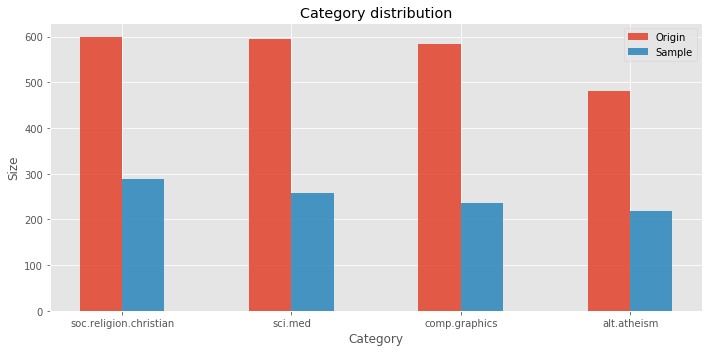

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

n_groups = len(X.category_name.value_counts().index)

# data
origin = X['category_name'].value_counts().values
sample = X_sample['category_name'].value_counts().values

# figure format
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.9
error_config = {'ecolor': '0.3'}

# set bar plot
rects1 = ax.bar(index, origin, bar_width,
                alpha=opacity,
                label='Origin')

rects2 = ax.bar(index + bar_width, sample, bar_width,
                alpha=opacity,
                label='Sample')

# label
ax.set_xlabel('Category')
ax.set_ylabel('Size')
ax.set_title('Category distribution')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(X.category_name.value_counts().index)
ax.legend(loc='best', bbox_to_anchor=(1, 1))

# show
fig.tight_layout()
plt.show()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

X_counts[0:5,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [10]:
fifthRecord = X_counts[0:5,0:100].toarray()[4]

In [11]:
pos = -1
for i, term in enumerate(fifthRecord):
    if (i != 0 and term == 1):
        pos = i
        break
        
count_vect.get_feature_names()[i:i+1]

['01']

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [25]:
# count_vect_sample = CountVectorizer()
# X_counts = count_vect_sample.fit_transform(X_sample.text)

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[:40]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[:40]]
plot_z = X_counts[:40, :40].toarray()

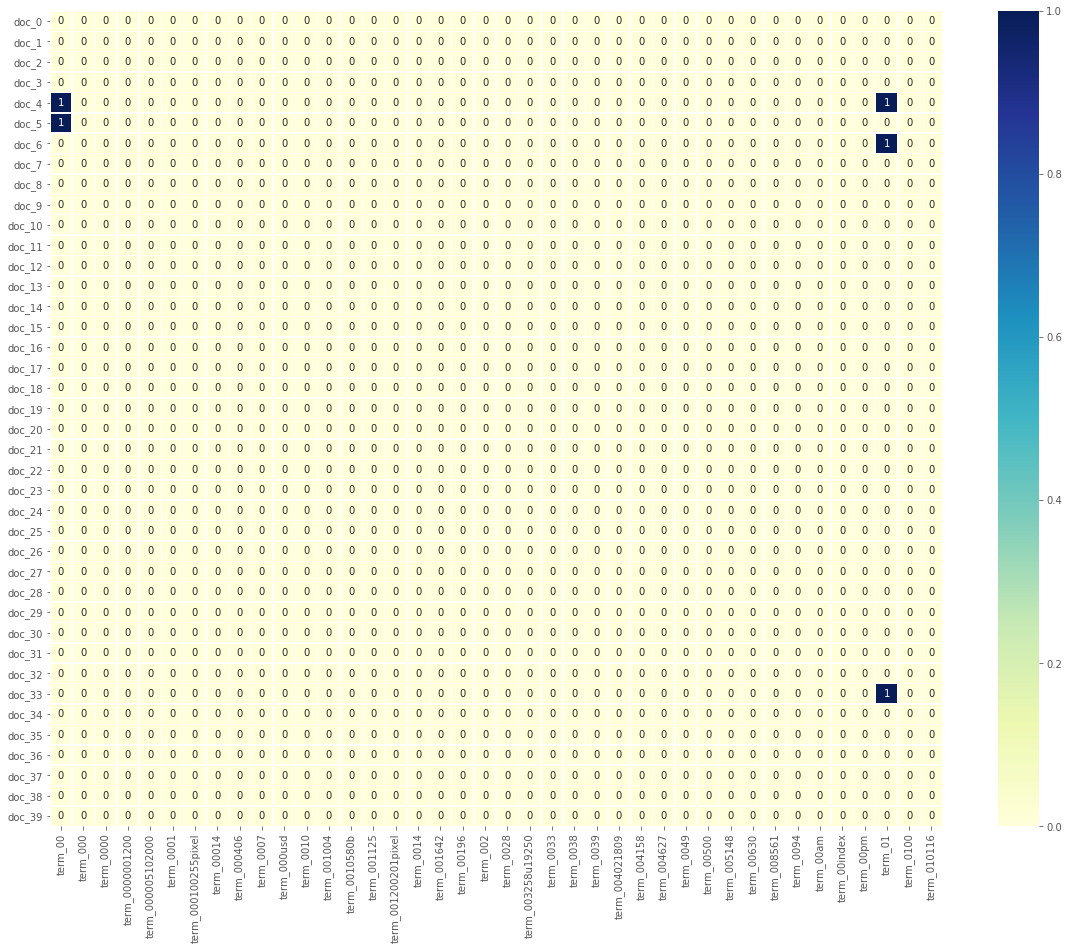

In [26]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

# plt.subplots(figsize=(9, 7))
plt.subplots(figsize=(20,15))
ax = sns.heatmap(df_todraw,
                 cmap="YlGnBu",
                 vmin=0, vmax=1, annot=True, linewidths=.5)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

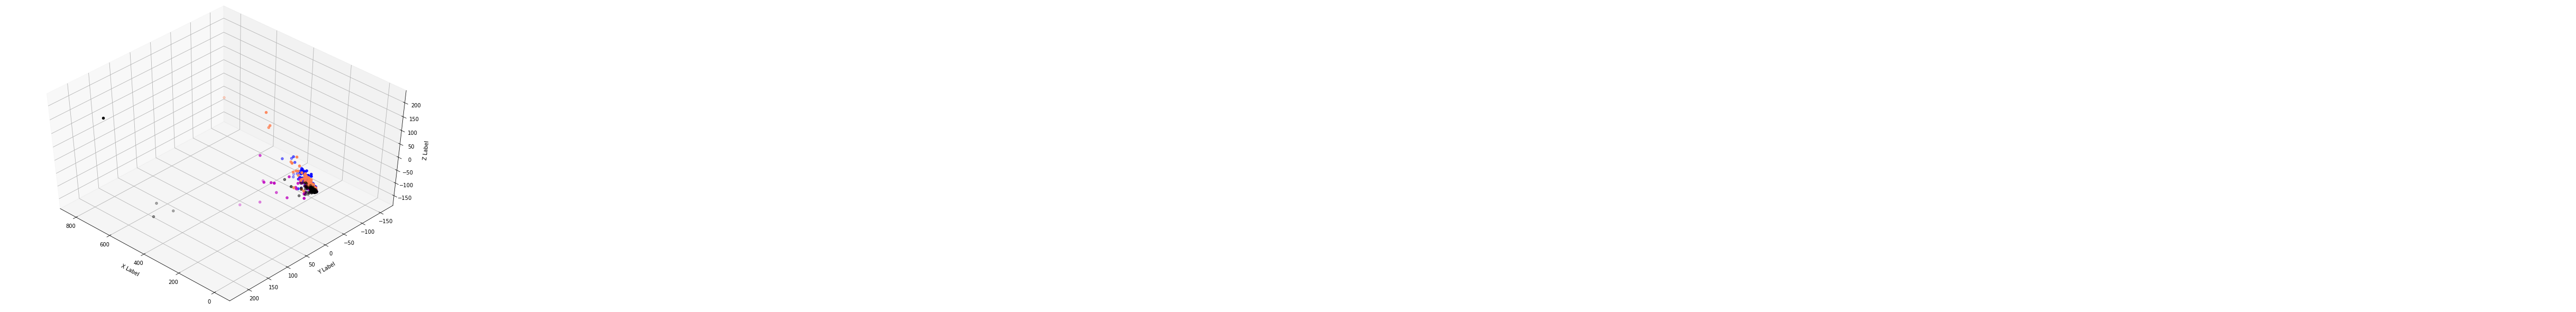

In [127]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(12, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

col = ['coral', 'blue', 'black', 'm']

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, color=c, marker='o')

# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

![Ex12](Ex12.png)

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this. Check last year's [notebook](https://github.com/omarsar/data_mining_2017_fall_lab/blob/master/news_data_mining.ipynb) for code on how to generate the interactive version of the plot above. 

In [128]:
def get_trace(X_pca, data, category, color):
    """ Build trace for plotly chart based on category """
    trace = go.Scatter3d(
        x=X_pca[data.apply(lambda x: True if x==category else False), 0],
        y=X_pca[data.apply(lambda x: True if x==category else False),1],
        z=X_pca[data.apply(lambda x: True if x==category else False),2],
        mode='markers',
        marker=dict(
            size=4,
            line=dict(
                color=color,
                width=0.2
            ),
            opacity=0.8
        ),
        text=data[data.apply(lambda x: True if x==category else False).tolist()]
    )
    return trace

In [130]:
trace1 = get_trace(X_reduced, X["category_name"], "alt.atheism", "rgb(71,233,163)")
trace2 = get_trace(X_reduced, X["category_name"], "soc.religion.christian", "rgb(52,133,252)")
trace3 = get_trace(X_reduced, X["category_name"], "comp.graphics", "rgb(229,65,136)")
trace4 = get_trace(X_reduced, X["category_name"], "sci.med", "rgb(99,151,68)")

In [131]:
data = [trace1, trace2, trace3, trace4]

In [133]:
! pip install plotly

    100% |################################| 37.8MB 1.2MB/s ta 0:00:01


In [135]:


layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~poilu119/0 or inside your plot.ly account where it is named 'simple-3d-scatter'


![Ex13-1](Ex13-1.png)

In [187]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [189]:
def plot_word_frequency(word_list, plot_title):
    trace1 = {
        "x": list(word_list[0]),
        "y": list(word_list[1]),
        "type": "bar"
    }

    data = go.Data([trace1])

    layout = {
        "title": plot_title,
        "yaxis": {"title": "Frequency"}
    }

    fig = go.Figure(data = data, layout=layout)
    return fig

In [190]:
py.iplot(plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

/home/lu/anaconda3/envs/NTHU_DataMining/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




The draw time for this plot will be slow for clients without much RAM.


/home/lu/anaconda3/envs/NTHU_DataMining/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow



![Ex13-2](Ex13-2.png)

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [181]:
def get_trace(X_pca, data, color):
    """ Build trace for plotly chart based on category """
    trace = go.Scatter3d(
        x=X_pca[data, 0],
        y=X_pca[data,1],
        z=X_pca[data,2],
        mode='markers',
        marker=dict(
            size=4,
            line=dict(
                color=color,
                width=0.2
            ),
            opacity=0.8
        ),
#         text=data[data.apply(lambda x: True if x==category else False).tolist()]
    )
    return trace

In [182]:
trace1 = get_trace(X_reduced, X.index[X.category_name == 'alt.atheism'][0:100], "rgb(71,233,163)")
trace2 = get_trace(X_reduced, X.index[X.category_name == 'soc.religion.christian'][0:100], "rgb(52,133,252)")
trace3 = get_trace(X_reduced, X.index[X.category_name == 'comp.graphics'][0:100], "rgb(229,65,136)")
trace4 = get_trace(X_reduced, X.index[X.category_name == 'sci.med'][0:100], "rgb(99,151,68)")

In [184]:
data = [trace1, trace2, trace3, trace4]

In [185]:


layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter-100')

![Ex14](Ex14.png)

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [245]:
d = []
d.append(term_frequencies.tolist())
d.append(count_vect.get_feature_names())

sorted_term_frequencies_sort = sorted(term_frequencies.tolist(), reverse = True)
get_feature_names_sorted = [x for _,x in sorted(zip(d[0],d[1]), reverse = True)]

get_feature_names_sorted[:3]

['the', 'of', 'to']

In [246]:
py.iplot(plot_word_frequency([get_feature_names_sorted, sorted_term_frequencies_sort], "Term Frequency Distribution"))

The draw time for this plot will be slow for clients without much RAM.


![Ex15](Ex15.png)

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [186]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()

X[0:9]

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


---

### Part2: New dataset (Lab1 operations)

#### Load data set

In [8]:
# import sentimentLabelledSentences.

import glob
path = glob.glob("./sentimentLabelledSentences/*.txt")
filename = []
for i, p in enumerate(path):
    print(i, p)
    filename.append(p.split("/")[2].split("_labelled.txt")[0])

data = []
for i, p in enumerate(path):
    with open(path[i], encoding="utf-8") as f:
         data.append(f.read())
    f.closed

dataset = {}
for i, d in enumerate(data):
    dataset[i] = {'name':filename[i], 'data':d}

# This load dataset as
# 'yelp' -> data
# 'imdb' -> data
# 'amazon_cells' -> data

0 ./sentimentLabelledSentences/yelp_labelled.txt
1 ./sentimentLabelledSentences/imdb_labelled.txt
2 ./sentimentLabelledSentences/amazon_cells_labelled.txt


In [3]:
print("This is file 1: ", dataset[0]['name'])
print(dataset[0]['data'][0:100])

This is file 1:  yelp
Wow... Loved this place.	1
Crust is not good.	0
Not tasty and the texture was just nasty.	0
Stopped 


In [334]:
print("This is file 2: ", dataset[1]['name'])
print(dataset[1]['data'][0:100])

This is file 2:  imdb
A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  	0
Not sure w


In [335]:
print("This is file 3: ", dataset[2]['name'])
print(dataset[2]['data'][0:100])

This is file 3:  amazon_cells
So there is no way for me to plug it in here in the US unless I go by a converter.	0
Good case, Exce


#### Data operation steps

##### > Data Length

In [31]:
for i in range(len(dataset)):
    print("dataset name:", dataset[i]['name'])
    print("length:", len(dataset[i]['data']), "\n")

dataset name: yelp
length: 61316 

dataset name: imdb
length: 85272 

dataset name: amazon_cells
length: 58226 



##### > Data Explore

In [339]:
print("\n".join(dataset[0]['data'].split("\n"))[0:100])

Wow... Loved this place.	1
Crust is not good.	0
Not tasty and the texture was just nasty.	0
Stopped 


#### Data Transformation

##### > Converting into Pandas Dataframe

In [9]:
def format_rows(docs):
    """ format the text field and strip special characters """
    D = []
    for line in docs.split('\n'):
        if (line != ""):
            line = line[:-1]
            temp_d = line.strip('\t')
            D.append([temp_d])
    return D

In [10]:
print("format dataset: ", dataset[0]['name'], "\n", "result: \n")
format_rows(dataset[0]['data'])[0:3]

format dataset:  yelp 
 result: 



[['Wow... Loved this place.'],
 ['Crust is not good.'],
 ['Not tasty and the texture was just nasty.']]

In [11]:
alldata = ""
for i in range(len(dataset)):
    alldata = alldata + dataset[i]['data']

X = pd.DataFrame.from_records(format_rows(alldata), columns= ['text'])

In [36]:
len(X)

3000

In [37]:
X[0:2]

,text
0,Wow... Loved this place.
1,Crust is not good.


In [38]:
X[-2:]

,text
2998,The only thing that disappoint me is the infra...
2999,"You can not answer calls with the unit, never ..."


##### > Adding Columns

In [12]:
def format_scores(docs):
    """ format the text field and strip special characters """
    D = []
    for line in docs.split('\n'):
        if (line != ""):
            D.append(line[-1])
    return D

In [13]:
X['scores'] = format_scores(alldata)

In [41]:
X[0:2]

,text,scores
0,Wow... Loved this place.,1
1,Crust is not good.,0


In [42]:
X[-2:]

,text,scores
2998,The only thing that disappoint me is the infra...,0
2999,"You can not answer calls with the unit, never ...",0


In [14]:
dataLabel = []
for i in range(len(dataset)):
    d = dataset[i]
    for line in d['data'].split('\n'):
        if (line != ""):
            dataLabel.append(d['name'])
        
X['category_name'] = dataLabel

In [44]:
X[:2]

,text,scores,category_name
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp


In [15]:
X[-2:]

,text,scores,category_name
2998,The only thing that disappoint me is the infra...,0,amazon_cells
2999,"You can not answer calls with the unit, never ...",0,amazon_cells


In [46]:
X[0:10]

,text,scores,category_name
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp
5,Now I am getting angry and I want my damn pho.,0,yelp
6,Honeslty it didn't taste THAT fresh.),0,yelp
7,The potatoes were like rubber and you could te...,0,yelp
8,The fries were great too.,1,yelp
9,A great touch.,1,yelp


#### Familiarize with the Data

In [47]:
X.iloc[300::300, :][0:10]

,text,scores,category_name
300,Good beer & drink selection and good food sele...,1,yelp
600,I miss it and wish they had one in Philadelphia!,1,yelp
900,Spend your money elsewhere.,0,yelp
1200,This is definitely one of the bad ones.,0,imdb
1500,The entire audience applauded at the conclusio...,1,imdb
1800,"In fact, this stinker smells like a direct-to-...",0,imdb
2100,Integrated seamlessly with the Motorola RAZR p...,1,amazon_cells
2400,what a disappointment,0,amazon_cells
2700,"Also, the phone doesn't seem to accept anythin...",0,amazon_cells


In [48]:
X[X['category_name'] == 'amazon_cells'].iloc[300::10, :][0:10]

,text,scores,category_name
2300,Sending it back.,0,amazon_cells
2310,"This is a good battery, and it got here really...",1,amazon_cells
2320,I am also very happy with the price.,1,amazon_cells
2330,VERY comfortable.,1,amazon_cells
2340,Excellent sound quality.,1,amazon_cells
2350,Were JERKS on the phone.,0,amazon_cells
2360,Nice design and quality.,1,amazon_cells
2370,"I'll be drivng along, and my headset starts ri...",0,amazon_cells
2380,Great Hands Free Device.,1,amazon_cells
2390,Exactly what I wanted.,1,amazon_cells


#### Data Mining using Pandas

##### > Missing Values

In [49]:
def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

In [50]:
X.isnull().apply(lambda x: check_missing_values(x))

text             (The amoung of missing records is: , 0)
scores           (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
dtype: object

##### > Duplicate Data

In [51]:
sum(X.duplicated())

17

In [52]:
sum(X.duplicated('text'))

17

###### >> Show duplicate data, to see what happened

In [16]:
X[X.duplicated('text', keep=False)]

,text,scores,category_name
334,I love this place.,1,yelp
380,I won't be back.,0,yelp
383,The food was terrible.,0,yelp
505,I would not recommend this place.,0,yelp
814,I love this place.,1,yelp
816,The food was terrible.,0,yelp
843,I won't be back.,0,yelp
846,I would not recommend this place.,0,yelp
1090,Definitely worth checking out.,1,imdb
1125,10/10,1,imdb


###### >> remove duplicate

In [17]:
X.drop_duplicates(keep='first', inplace=True)

###### >> check duplicate again

In [55]:
sum(X.duplicated())

0

In [18]:
X[-2:]

,text,scores,category_name
2998,The only thing that disappoint me is the infra...,0,amazon_cells
2999,"You can not answer calls with the unit, never ...",0,amazon_cells


In [57]:
len(X[:])

2983

In [58]:
X.isnull().apply(lambda x: check_missing_values(x))

text             (The amoung of missing records is: , 0)
scores           (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
dtype: object

###### >> The pandas row index doesn't change, but querry index changes

In [59]:
X[813:815]

,text,scores,category_name
813,It was packed!!,0,yelp
815,I can say that the desserts were yummy.,1,yelp


###### >> Resetting index

In [19]:
X = X.reset_index(drop=True)

In [61]:
# Index has been reset
X[813:815]

,text,scores,category_name
813,It was packed!!,0,yelp
814,I can say that the desserts were yummy.,1,yelp


In [20]:
X[-2:]

,text,scores,category_name
2981,The only thing that disappoint me is the infra...,0,amazon_cells
2982,"You can not answer calls with the unit, never ...",0,amazon_cells


#### Data Preprocessing

In [63]:
X_sample = X.sample(n=1000)

In [64]:
len(X_sample)

1000

In [65]:
X_sample[0:4]

,text,scores,category_name
2306,The battery is unreliable as well as the servi...,0,amazon_cells
2181,Waste of 13 bucks.,0,amazon_cells
181,I also decided not to send it back because our...,0,yelp
2769,It was horrible!.,0,amazon_cells


In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

imdb            997
yelp            996
amazon_cells    990
Name: category_name, dtype: int64


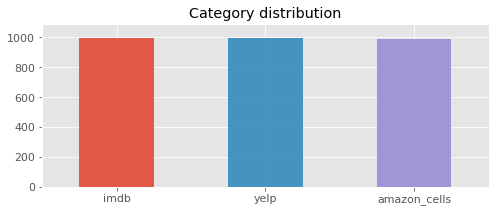

In [67]:
print(X.category_name.value_counts())

# plot barchart for X
upperbound = int(max(X.category_name.value_counts())*1.1) // 10 * 10
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, upperbound],  
                                    alpha= 0.9,
                                    rot = 0, fontsize = 11, figsize = (8,3))

amazon_cells    345
yelp            330
imdb            325
Name: category_name, dtype: int64


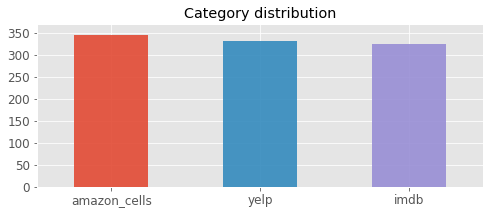

In [68]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
upperbound = int(max(X_sample.category_name.value_counts())*1.1) // 10 * 10
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upperbound], 
                                           alpha= 0.9,
                                           rot = 0, fontsize = 12, figsize = (8,3))

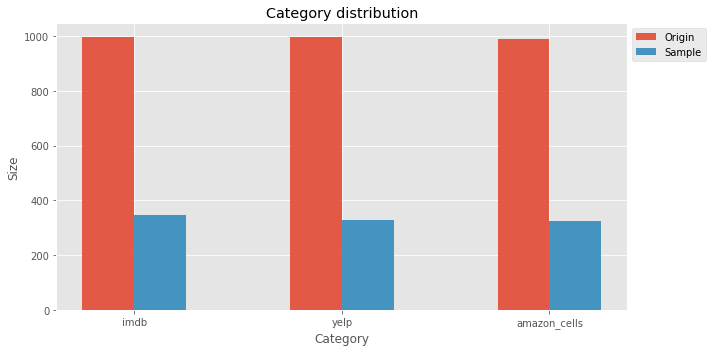

In [69]:
n_groups = len(X.category_name.value_counts().index)

# data
origin = X['category_name'].value_counts().values
sample = X_sample['category_name'].value_counts().values

# figure format
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.9
error_config = {'ecolor': '0.3'}

# set bar plot
rects1 = ax.bar(index, origin, bar_width,
                alpha=opacity,
                label='Origin')

rects2 = ax.bar(index + bar_width, sample, bar_width,
                alpha=opacity,
                label='Sample')

# label
ax.set_xlabel('Category')
ax.set_ylabel('Size')
ax.set_title('Category distribution')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(X.category_name.value_counts().index)
ax.legend(loc='best', bbox_to_anchor=(1, 1))

# show
fig.tight_layout()
plt.show()

#### Feature Creation

In [21]:
import nltk

In [22]:
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

In [23]:
X['unigrams'] = X['text'].apply(lambda x: tokenize_text(x))

In [24]:
X[0:4]

,text,scores,category_name,unigrams
0,Wow... Loved this place.,1,yelp,"[Wow, ..., Loved, this, place, .]"
1,Crust is not good.,0,yelp,"[Crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0,yelp,"[Not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1,yelp,"[Stopped, by, during, the, late, May, bank, ho..."


In [74]:
list(X[0:1]['unigrams'])

[['Wow', '...', 'Loved', 'this', 'place', '.']]

#### Feature subset selection

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [77]:
X_counts

<2983x5155 sparse matrix of type '<class 'numpy.int64'>'
	with 31515 stored elements in Compressed Sparse Row format>

In [78]:
analyze = count_vect.build_analyzer()

In [79]:
X_counts.shape

(2983, 5155)

In [80]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [81]:
X_counts[0:5,0:100]

<5x100 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>

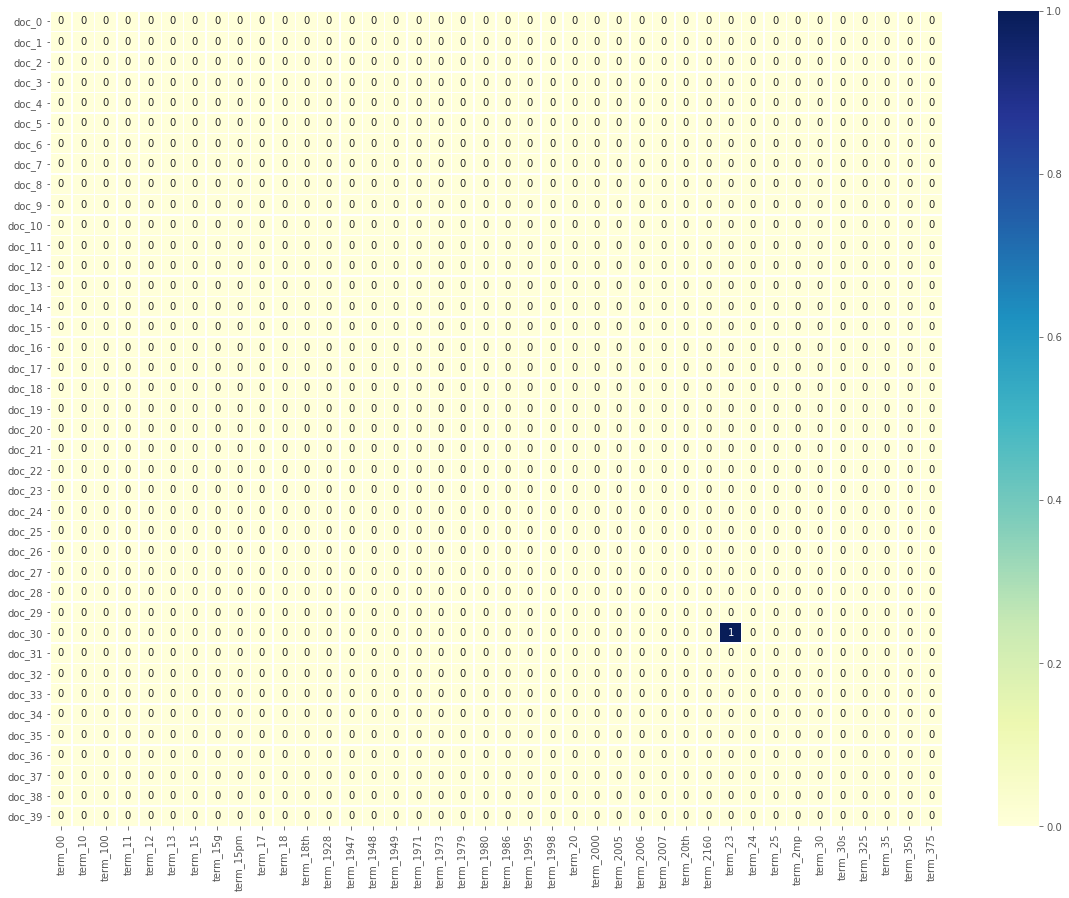

In [82]:
import seaborn as sns

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[:40]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[:40]]
plot_z = X_counts[:40, :40].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

# plt.subplots(figsize=(9, 7))
plt.subplots(figsize=(20,15))
ax = sns.heatmap(df_todraw,
                 cmap="YlGnBu",
                 vmin=0, vmax=1, annot=True, linewidths=.5)

###### > Since the data is really sparse as shown above, we need to reduce the dimension

#### Dimensionality Reduction

In [437]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [438]:
X_reduced.shape

(2983, 2)

In [439]:
categories = []
for i, ca in enumerate(X.category_name.value_counts().index):
    categories.append(ca)
categories

['imdb', 'yelp', 'amazon_cells']

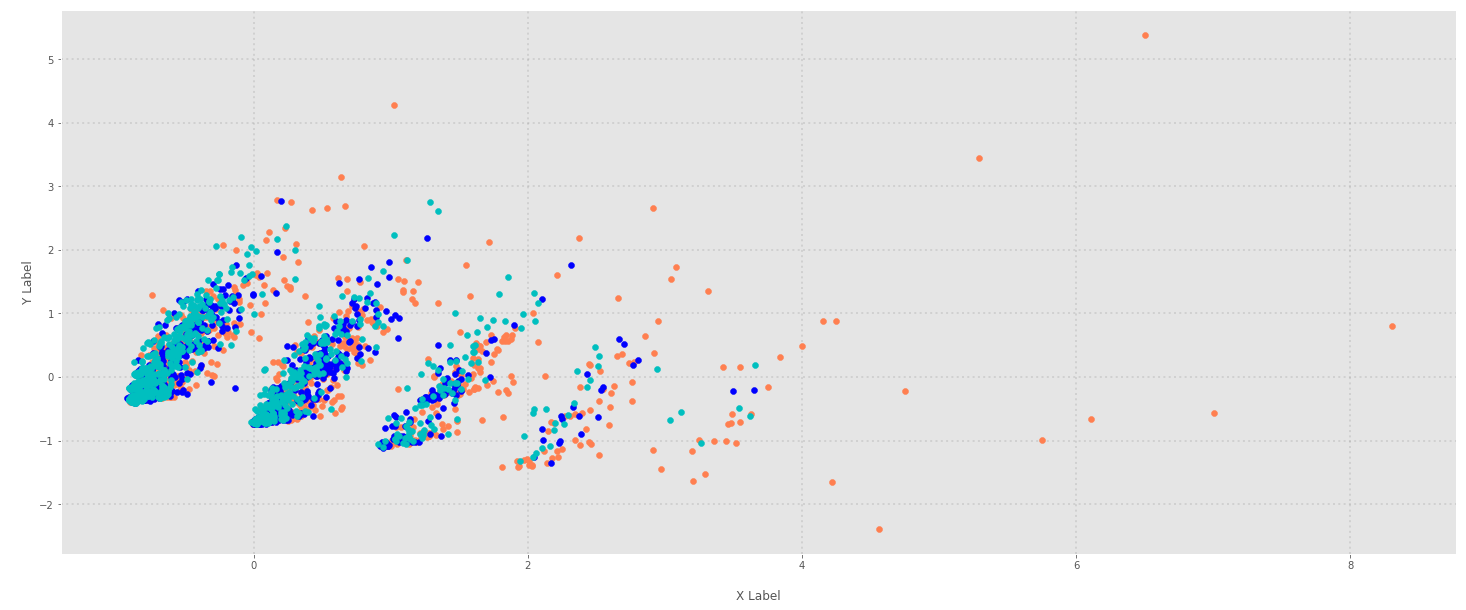

In [440]:
col = ['coral', 'blue', 'c']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

#### Atrribute Transformation / Aggregation

In [113]:
import numpy as np
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [114]:
term_frequencies[0]

1

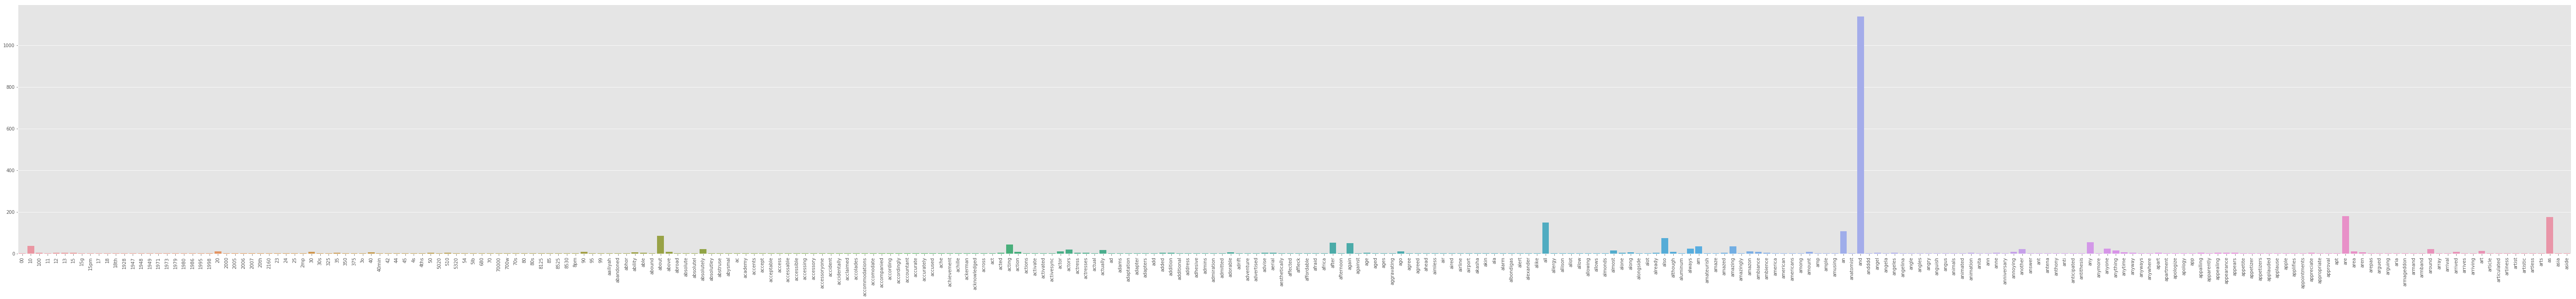

In [115]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [116]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

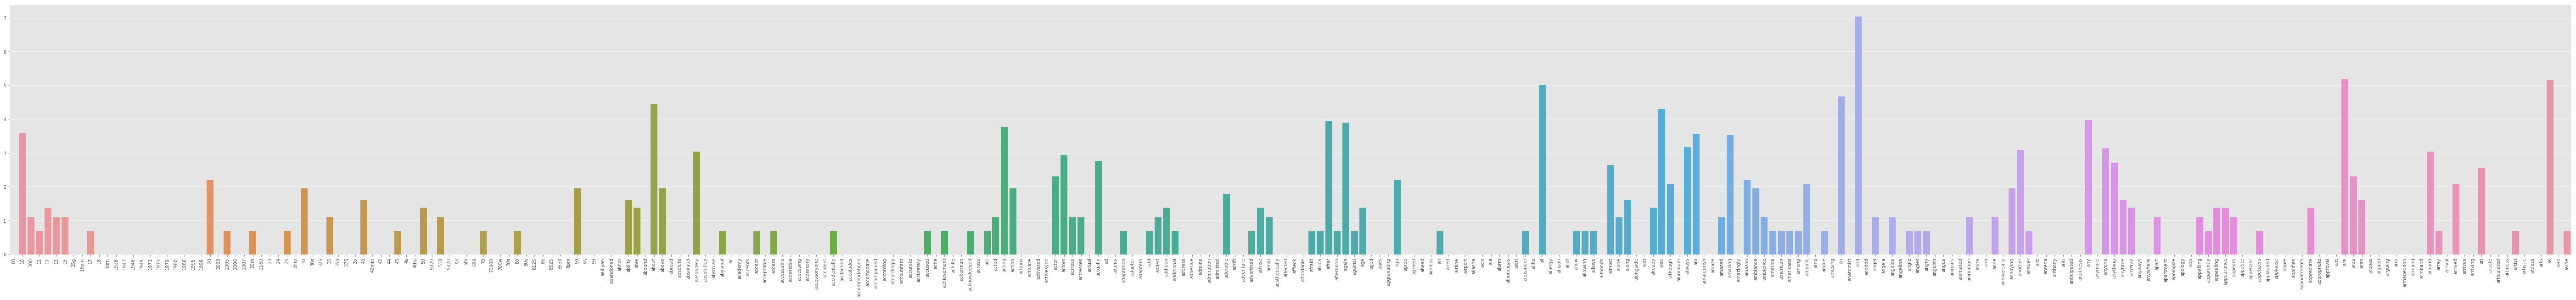

In [117]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [118]:
sorted_term_frequencies_log = sorted(term_frequencies_log, reverse = True)

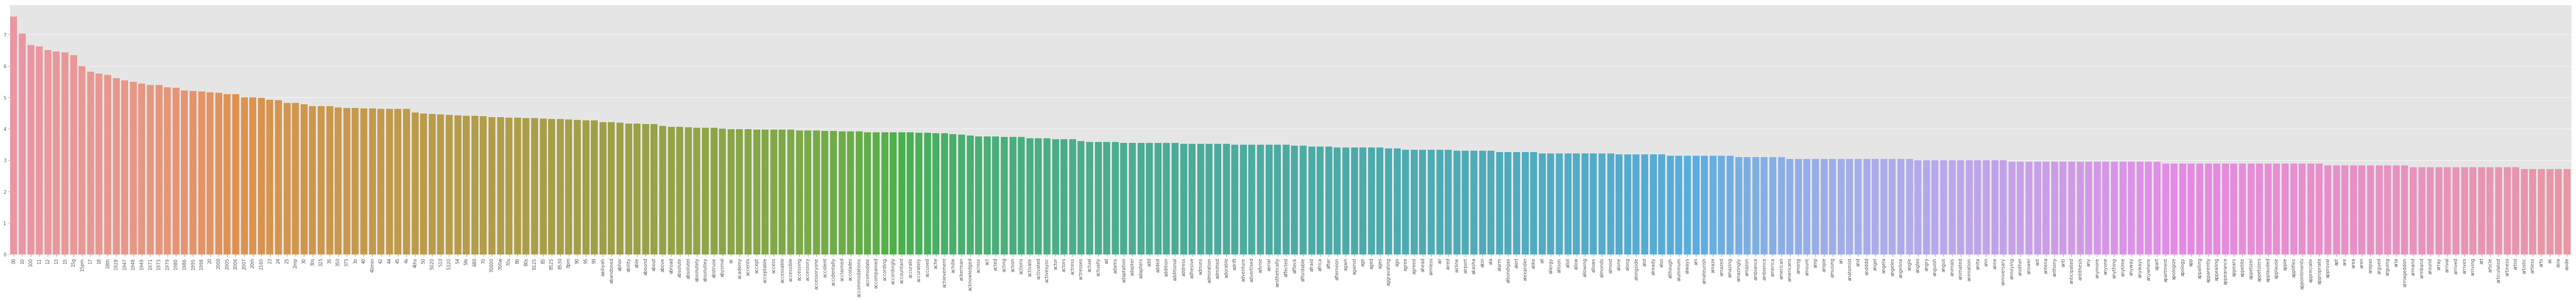

In [121]:








plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=sorted_term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [122]:
len(sorted_term_frequencies_log)

5155

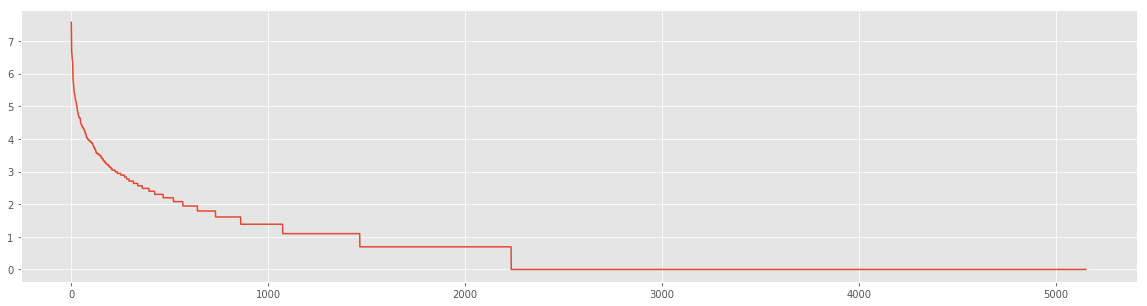

In [346]:
plt.figure(figsize=(20, 5))
plt.plot(sorted_term_frequencies_log)

#### Discretization and Binarization

### Part3 New dataset & Your new operation

#### TF-IDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_Tfid = vectorizer.fit_transform(X.text)

#### Compare distance

##### Generate random sentence

In [135]:
X_Tfid.shape[0]

2983

In [282]:
import random

position_a = []
position_b = []
for i in range(5):
    position_a.append(random.randint(0, X_Tfid.shape[0]))
    print(i, "th sentance: ")
    print("Sentence A \n", "category:", X.category_name[position_a[i]], "\t index: ", position_a[i])
    print(X.text[position_a[i]], "\n")
    
#     position_b.append(random.randint(0, X_Tfid.shape[0]))
#     print("Sentence B \n", "category:", X.category_name[position_b[i]], "\t index: ", position_b[i])
#     print(X.text[position_b[i]], "\n")
    


0 th sentance: 
Sentence A 
 category: yelp 	 index:  867
this is the worst sushi i have ever eat besides Costco's. 

1 th sentance: 
Sentence A 
 category: yelp 	 index:  771
Great time - family dinner on a Sunday night. 

2 th sentance: 
Sentence A 
 category: yelp 	 index:  802
Why are these sad little vegetables so overcooked? 

3 th sentance: 
Sentence A 
 category: amazon_cells 	 index:  2287
This is hands down the best phone I've ever had. 

4 th sentance: 
Sentence A 
 category: amazon_cells 	 index:  1993
So there is no way for me to plug it in here in the US unless I go by a converter. 



##### Euclidean distance

In [351]:
def EuclideanD(x, y):
    if (len(x) == len(y)):
        result = 0
        for i in range(len(x)):
            result += (x[i] - y[i]) ** 2
        result = math.sqrt(result)
        return result
    else:
        return "size doesn't match"

###### > Frenquency

In [352]:
Conuts_Euclidean = [[None for i in range(len(position_a))] for j in range(len(position_a))]

for i in range(len(position_a)):
    for j in range(len(position_a)):
        Conuts_Euclidean[i][j] = EuclideanD(X_counts[position_a[i]:position_a[i]+1,:].toarray()[0], 
                                            X_counts[position_a[j]:position_a[j]+1,:].toarray()[0])

In [361]:
Conuts_Euclidean = np.array(Conuts_Euclidean)
np.set_printoptions(precision=2)
print(Conuts_Euclidean)

[[0.   4.12 4.24 3.46 5.2 ]
 [4.12 0.   3.87 4.12 5.29]
 [4.24 3.87 0.   4.24 5.2 ]
 [3.46 4.12 4.24 0.   5.2 ]
 [5.2  5.29 5.2  5.2  0.  ]]


###### > TF-IDF

In [354]:
Tfid_Euclidean = [[None for i in range(len(position_a))] for j in range(len(position_a))]

for i in range(len(position_a)):
    for j in range(len(position_a)):
        Tfid_Euclidean[i][j] = EuclideanD(X_Tfid[position_a[i]:position_a[i]+1,:].toarray()[0], 
                                          X_Tfid[position_a[j]:position_a[j]+1,:].toarray()[0])

In [357]:
Tfid_Euclidean = np.array(Tfid_Euclidean)
np.set_printoptions(precision=2)
print(Tfid_Euclidean)

[[0.   1.41 1.41 1.3  1.4 ]
 [1.41 0.   1.41 1.41 1.41]
 [1.41 1.41 0.   1.41 1.38]
 [1.3  1.41 1.41 0.   1.39]
 [1.4  1.41 1.38 1.39 0.  ]]


###### > Compare result

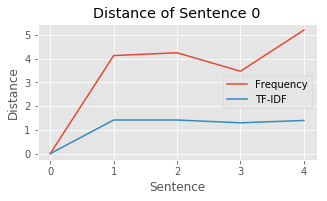

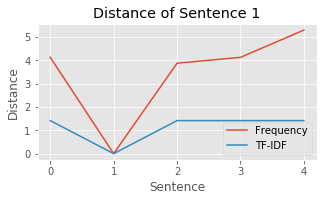

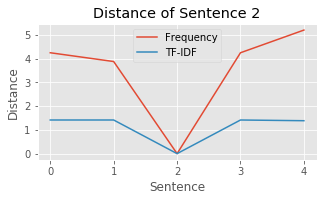

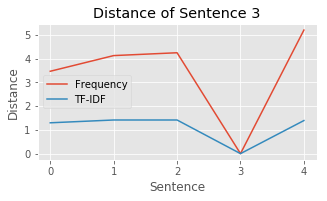

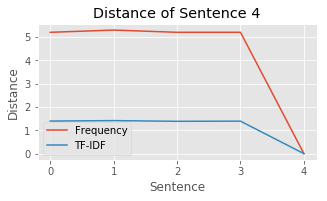

In [356]:
for i in range(len(Conuts_Euclidean)):
    plt.figure(figsize=(5, 2.5))
    plt.plot(Conuts_Euclidean[i], label="Frequency")
    plt.plot(Tfid_Euclidean[i], label="TF-IDF")
    plt.xticks(np.arange(0, len(Conuts_Euclidean), 1.0))
    plt.xlabel('Sentence')
    plt.ylabel('Distance')
    title = "Distance of Sentence " + str(i)
    plt.title(title, loc='center')
    plt.legend()

###### > Discussion

As we can see, the sentence 4 is totally different from other sentence. It has the highest distence toward others.  
Checking the origin sentence, we can find that sentence 4 has longest word, and those word are diffent from others.  
>Sentence 4  
So there is no way for me to plug it in here in the US unless I go by a converter. 

<br>

And we can see from the matrix, sentence 0 and sentnece 3 has the most closest distence. Which infers that they use similar words.
>Sentence 0  
This is the worst sushi i have ever eat besides Costco's.  
<br>
Sentence 3  
This is hands down the best phone I've ever had.

<br>

Form the figure, we can find that frequency is refers to word occurrence. And TF-IFD refers to how important the word should be. So we can see, using TF-IDF for ploting distance, the result is more flat, which means it eliminate some words that is not important but appers alot.

###### > We can see from below

In [303]:
np.array(X_Tfid[:,:].toarray()).max()

1.0

In [305]:
np.array(X_counts[:,:].toarray()).max()

8

The frequcy maximum is 8, which means in some sentence, some word appers 8 times; but for TF-IDF, we consider the maximum is 1, which means we no longer cosider only occurrence, but also the importance. 

Find the maximum of the array below, and see what sentence and word it refers to

In [308]:
tt = np.array(X_counts[:,:].toarray())

np.where(tt == np.max(tt))

(array([1294, 1614]), array([4531,  216]))

In [324]:
X_counts[1294:1295,4531:4532].toarray()

array([[8]])

In [328]:
X_Tfid[1294:1295,4531:4532].toarray()[0][0]

0.3266572822576116

In [329]:
vectorizer.get_feature_names()[4531:4532]

['the']

In [325]:
count_vect.get_feature_names()[4531:4532]

['the']

In [321]:
pd.set_option('display.max_colwidth', -1)
X['unigrams'][1294:1295]

1294    [I, have, to, mention, this, and, it, is, a, huge, SPOILER, ,, i, loved, the, ending, ,, how, all, the, characters, of, the, three, films, were, the, remaining, survivors, of, the, ferry, disaster, ,, with, Valentine, and, the, young, judge, together, ,, and, the, old, man, watching, it, on, her, TV, ,, solidifying, his, happiness, over, the, suffering, which, he, dealt, with, for, those, many, years, .]
Name: unigrams, dtype: object

 And we can see for #1294 in our dataset, the word "the" occurs 8 times. But for TF-IDF, it is 0.326

##### Cosine similarity

In [369]:
def CosineSimilarity(x, y):
    if (len(x) == len(y)):
        x_sqr = 0
        y_sqr = 0
        xy = 0
        for i in range(len(x)):
            xy += x[i] * y[i]
            x_sqr += x[i] ** 2
            y_sqr += y[i] ** 2
        result = xy / (math.sqrt(x_sqr) * math.sqrt(y_sqr))
        return result
    else:
        return "size doesn't match"

###### > Frenquency

In [370]:
Conuts_Cosine = [[None for i in range(len(position_a))] for j in range(len(position_a))]

for i in range(len(position_a)):
    for j in range(len(position_a)):
        Conuts_Cosine[i][j] = CosineSimilarity(X_counts[position_a[i]:position_a[i]+1,:].toarray()[0], 
                                               X_counts[position_a[j]:position_a[j]+1,:].toarray()[0])

In [378]:
Conuts_Cosine = np.array(Conuts_Cosine)
np.set_printoptions(precision=2)
print(Conuts_Cosine)

[[1.   0.   0.   0.4  0.14]
 [0.   1.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.08]
 [0.4  0.   0.   1.   0.14]
 [0.14 0.   0.08 0.14 1.  ]]


###### > TF-IDF

In [373]:
Tfid_Cosine = [[None for i in range(len(position_a))] for j in range(len(position_a))]

for i in range(len(position_a)):
    for j in range(len(position_a)):
        Tfid_Cosine[i][j] = CosineSimilarity(X_Tfid[position_a[i]:position_a[i]+1,:].toarray()[0], 
                                             X_Tfid[position_a[j]:position_a[j]+1,:].toarray()[0])

In [374]:
Tfid_Cosine = np.array(Tfid_Cosine)
np.set_printoptions(precision=2)
print(Tfid_Cosine)

[[1.   0.   0.   0.16 0.03]
 [0.   1.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.04]
 [0.16 0.   0.   1.   0.03]
 [0.03 0.   0.04 0.03 1.  ]]


###### > Compare result

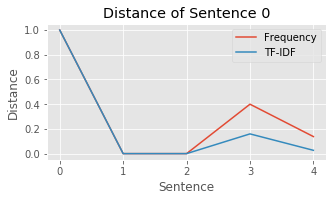

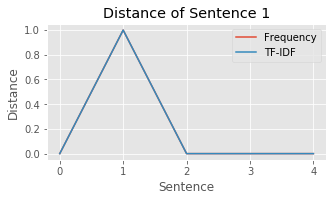

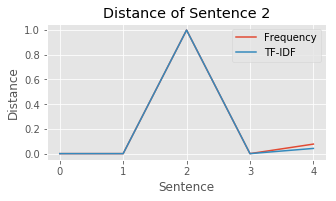

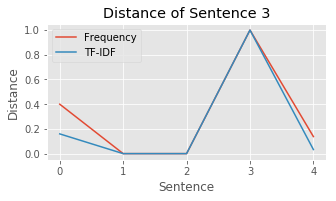

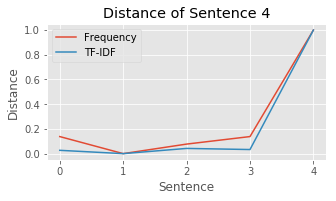

In [376]:
for i in range(len(Conuts_Cosine)):
    plt.figure(figsize=(5, 2.5))
    plt.plot(Conuts_Cosine[i], label="Frequency")
    plt.plot(Tfid_Cosine[i], label="TF-IDF")
    plt.xticks(np.arange(0, len(Conuts_Cosine), 1.0))
    plt.xlabel('Sentence')
    plt.ylabel('Distance')
    title = "Distance of Sentence " + str(i)
    plt.title(title, loc='center')
    plt.legend()

###### > Discussion

From above figure, it is eaiser to understand than Euclidean, the cosine distance = 1, means that is the same. And the closer to 1, the higher the similarity.  
So from the figure, sentence 1 is totally different from others, which is not significant in Euclidean distance. The reason for this is, Euclidean distance take 0 into account, therefore if one has 0, and one has higher value, it still counts them.  
<br>
consider 2 sentence:  
>1. the the the
2. a a a  

the Euclidean distance shows that they somehow has similarity, while cosine distance show that they have no similarity.
<br>
<br>
Back to sentence, we can see:

>0 th sentance: 
this is the worst sushi i have ever eat besides Costco's. 
<br>
1 th sentance: 
Great time - family dinner on a Sunday night. 
<br>
2 th sentance: 
Why are these sad little vegetables so overcooked? 
<br>
3 th sentance: 
This is hands down the best phone I've ever had. 
<br>
4 th sentance: 
So there is no way for me to plug it in here in the US unless I go by a converter. 

there's no word in 1st sentence are the same as others. (notice that, when we do the transformation, it doesn't take a single letter like 'a' in to account, as shown from below code. And that's the reson why sentence 1 has 'a' and sentence 4 also has 'a', and they somehow doesn't consider has similarity)

In [380]:
dummy = []
for i in range(len(position_a)):
    for j in range(len(position_a)):
        if (i == j and (i == 1 or i ==4)):
            dummy.append(X_counts[position_a[i]:position_a[i]+1,:].toarray()[0])

In [381]:
dummy

[array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0])]

In [386]:
np.array(dummy[0]).max()

1

In [396]:
kk = np.array(dummy[0])
jj1 = np.where(kk == np.max(kk))

In [393]:
np.array(dummy[1]).max()

2

In [397]:
ww = np.array(dummy[1])
jj2 = np.where(ww == 1)

This is sentence 1's feature

In [402]:
for i in range(len(jj1[0])):
    print(count_vect.get_feature_names()[jj1[0][i]:jj1[0][i]+1])

['dinner']
['family']
['great']
['night']
['on']
['sunday']
['time']


And this is sentence 4's feature

In [403]:
for i in range(len(jj2[0])):
    print(count_vect.get_feature_names()[jj2[0][i]:jj2[0][i]+1])

['by']
['converter']
['for']
['go']
['here']
['is']
['it']
['me']
['no']
['plug']
['so']
['the']
['there']
['to']
['unless']
['us']
['way']


#### Naive Bayes classifier

In [30]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

##### Frenquency features

In [28]:
frequencyX = X_counts[:,:].toarray()
frequencyY = X['category_name'].values

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(frequencyX, frequencyY, test_size=0.25)

In [34]:
Y_train

array(['imdb', 'imdb', 'amazon_cells', ..., 'yelp', 'yelp',
       'amazon_cells'], dtype=object)

In [487]:
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.8337801608579088

In [488]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
mnb.score(X_test, Y_test)

0.8820375335120644

##### TF-IDF features

In [493]:
TFidfX = X_Tfid[:,:].toarray()
TFidfY = X['category_name'].values

In [503]:
X_train, X_test, Y_train, Y_test = train_test_split(TFidfX, TFidfY, test_size=0.25)

In [504]:
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.8190348525469169

In [505]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
mnb.score(X_test, Y_test)

0.8632707774798928